In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [ ]:
plt.style.use("fivethirtyeight")

In [2]:
import gmplot

In [31]:
water = pd.read_csv("LAWaterUse.csv")
water.head()

,FY 05/06,FY 06/07,FY 07/08,FY 08/09,FY 09/10,FY 10/11,FY 11/12,FY 12/13,Location 1
0,32,36,34,32,27,26,36,16,"91342\n(34.30514302800049, -118.43521825999971)"
1,18,19,17,14,13,13,13,12,"91309\n(34.21867307400049, -118.59758676999968)"
2,62,66,58,65,55,52,44,36,"91302\n(34.14327419400047, -118.6628270279997)"
3,31,35,32,31,26,26,27,24,"90272\n(34.04886156900045, -118.53572692799969)"
4,47,52,50,49,41,41,44,26,"91316\n(34.16673287800046, -118.5162960619997)"


In [32]:
year_columns = [col for col in water.columns if col[:2] == "FY"] #selection columns with FY 
water["total"] = water[year_columns].sum(axis = 1) #Total water usage averages
water.head()

,FY 05/06,FY 06/07,FY 07/08,FY 08/09,FY 09/10,FY 10/11,FY 11/12,FY 12/13,Location 1,total
0,32,36,34,32,27,26,36,16,"91342\n(34.30514302800049, -118.43521825999971)",239
1,18,19,17,14,13,13,13,12,"91309\n(34.21867307400049, -118.59758676999968)",119
2,62,66,58,65,55,52,44,36,"91302\n(34.14327419400047, -118.6628270279997)",438
3,31,35,32,31,26,26,27,24,"90272\n(34.04886156900045, -118.53572692799969)",232
4,47,52,50,49,41,41,44,26,"91316\n(34.16673287800046, -118.5162960619997)",350


In [33]:
#Extract zip code, latitude and longitude from Location 1 column
water["zip"] = water["Location 1"].apply(lambda x: x.split("\n")[0])
water["Location 1"] = water["Location 1"].apply(lambda x: x.split("\n")[1][1:-1])
water["latitude"] = water["Location 1"].apply(lambda x: float(x.split(",")[0]))
water["longitude"] = water["Location 1"].apply(lambda x: float(x.split(",")[1]))
water.head()

,FY 05/06,FY 06/07,FY 07/08,FY 08/09,FY 09/10,FY 10/11,FY 11/12,FY 12/13,Location 1,total,zip,latitude,longitude
0,32,36,34,32,27,26,36,16,"34.30514302800049, -118.43521825999971",239,91342,34.305143,-118.435218
1,18,19,17,14,13,13,13,12,"34.21867307400049, -118.59758676999968",119,91309,34.218673,-118.597587
2,62,66,58,65,55,52,44,36,"34.14327419400047, -118.6628270279997",438,91302,34.143274,-118.662827
3,31,35,32,31,26,26,27,24,"34.04886156900045, -118.53572692799969",232,90272,34.048862,-118.535727
4,47,52,50,49,41,41,44,26,"34.16673287800046, -118.5162960619997",350,91316,34.166733,-118.516296


In [63]:
#Replicate rows in new dataframe to produce heatmap
water_df = water.copy()
zipTotals = zip(water.zip.values, water.total.values)
for combination in zipTotals:
    zipSub = water[water["zip"] == combination[0]]
    for i in range(combination[1]):
        water_df = water_df.append(zipSub)
water_df.shape

(30352, 13)

In [64]:
water_df["latitude"] = water_df["latitude"].apply(lambda x: x + np.random.uniform(-0.0005, 0.0005))
water_df["longitude"] = water_df["longitude"].apply(lambda x: x + np.random.uniform(-0.0005, 0.0005))

In [65]:
LA = gmplot.GoogleMapPlotter(34.05, -118.25, 16)
LA.heatmap(water_df.latitude, water_df.longitude)
LA.draw("LAWater.html")

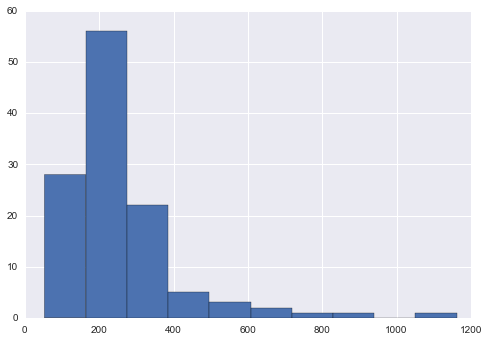

In [67]:
plt.hist(water.total);

In [82]:
df = pd.read_csv("LAEnergyUse.csv")
df.head()

,FY 05/06,FY 06/07,FY 07/08,FY 08/09,FY 09/10,FY 10/11,FY 11/12,FY 12/13,Location 1
0,273,280,276,273,275,264,262,265,"90058\n(34.00184426500044, -118.22112680399971)"
1,399,413,419,413,400,394,390,411,"90065\n(34.10881395500047, -118.22766603799971)"
2,847,853,858,826,790,763,757,796,"91311\n(34.25282047300044, -118.5950275619997)"
3,344,348,350,340,343,334,332,341,"90059\n(33.927010235000466, -118.24839605799968)"
4,378,387,391,380,370,363,357,373,"90004\n(34.07572239300049, -118.30301712299968)"


In [83]:
df["total"] = df[year_columns].median(axis = 1) #median electricity usage in time period
df["total"] = df["total"].apply(lambda x: int(round(x, 0)))
df.head()

,FY 05/06,FY 06/07,FY 07/08,FY 08/09,FY 09/10,FY 10/11,FY 11/12,FY 12/13,Location 1,total
0,273,280,276,273,275,264,262,265,"90058\n(34.00184426500044, -118.22112680399971)",273
1,399,413,419,413,400,394,390,411,"90065\n(34.10881395500047, -118.22766603799971)",406
2,847,853,858,826,790,763,757,796,"91311\n(34.25282047300044, -118.5950275619997)",811
3,344,348,350,340,343,334,332,341,"90059\n(33.927010235000466, -118.24839605799968)",342
4,378,387,391,380,370,363,357,373,"90004\n(34.07572239300049, -118.30301712299968)",376


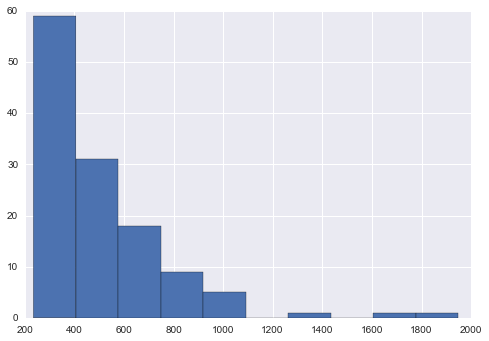

In [79]:
plt.hist(df.total);

In [84]:
df["zip"] = df["Location 1"].apply(lambda x: x.split("\n")[0])
df["Location 1"] = df["Location 1"].apply(lambda x: x.split("\n")[1][1:-1])
df["latitude"] = df["Location 1"].apply(lambda x: float(x.split(",")[0]))
df["longitude"] = df["Location 1"].apply(lambda x: float(x.split(",")[1]))
df.head()

,FY 05/06,FY 06/07,FY 07/08,FY 08/09,FY 09/10,FY 10/11,FY 11/12,FY 12/13,Location 1,total,zip,latitude,longitude
0,273,280,276,273,275,264,262,265,"34.00184426500044, -118.22112680399971",273,90058,34.001844,-118.221127
1,399,413,419,413,400,394,390,411,"34.10881395500047, -118.22766603799971",406,90065,34.108814,-118.227666
2,847,853,858,826,790,763,757,796,"34.25282047300044, -118.5950275619997",811,91311,34.252820,-118.595028
3,344,348,350,340,343,334,332,341,"33.927010235000466, -118.24839605799968",342,90059,33.927010,-118.248396
4,378,387,391,380,370,363,357,373,"34.07572239300049, -118.30301712299968",376,90004,34.075722,-118.303017


In [87]:
#Replicate rows in new dataframe to produce heatmap
electric = df.copy()
zipTotals = zip(df.zip.values, df.total.values)
for combination in zipTotals:
    zipSub = df[df["zip"] == combination[0]]
    for i in range(combination[1]):
        electric = electric.append(zipSub)
electric.shape

(63626, 13)

In [88]:
LA.heatmap(electric.latitude, electric.longitude)
LA.draw("LAElectric.html")